<a href="https://colab.research.google.com/github/xaterlupus/projects/blob/Attrition/AttritionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Project Work Business Analytics
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
attrition = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/EmployeeAttrition.csv')

In [3]:
attrition2 = attrition

In [4]:
rp_businesstravel = {'Non-Travel':1,'Travel_Rarely':3,'Travel_Frequently':2}
rp_department = {'Research & Development':2,'Sales':3,'Human Resources':1}
rp_eduf = {'Human Resources':1,'Life Sciences':2,'Marketing':3,'Medical':4,'Other':5,'Technical Degree':6}
rp_gender = {'Female':1,'Male':2}
rp_role = {'Healthcare Representative':1,'Human Resources':2,'Laboratory Technician':3,'Manager':4,'Manufacturing Director':5,'Research Director':6,'Research Scientist':7,'Sales Executive':8,'Sales Representative':9}
rp_mstat = {'Divorced':1,'Married':2,'Single':3}
rp_overtime = {'No':1,'Yes':2}

In [5]:
attrition.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
attrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
attrition.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [8]:
attrition.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [9]:
#check for categories
attrition.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

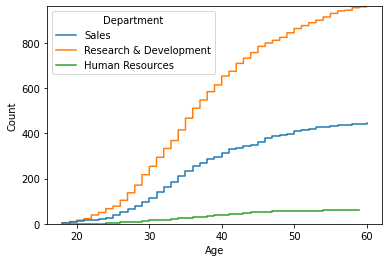

In [10]:
#visualize pairlot
sns.ecdfplot(data=attrition, x='Age', hue='Department', stat='count')

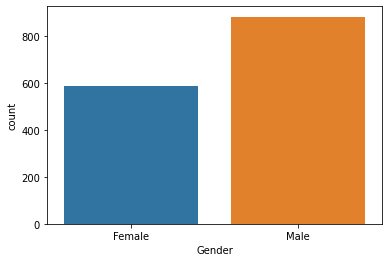

In [11]:
sns.countplot(x='Gender',data=attrition)

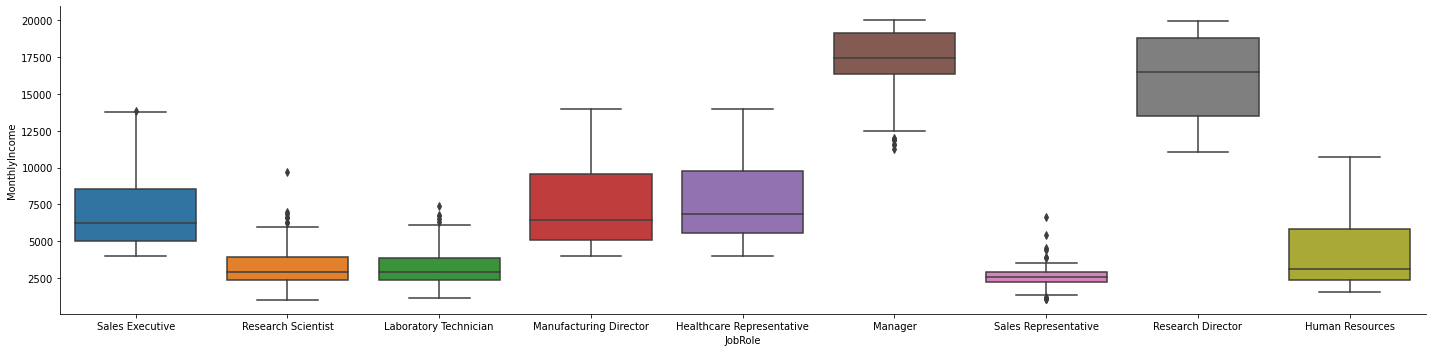

In [12]:
sns.catplot(x='JobRole',y='MonthlyIncome',data=attrition, kind='box', aspect=4)

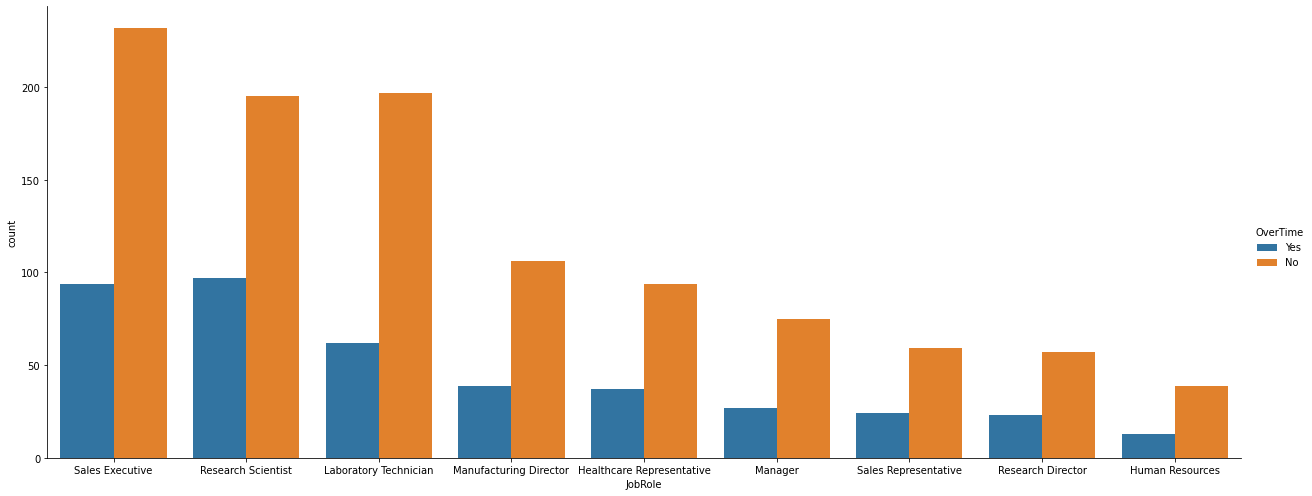

In [13]:
sns.catplot(x='JobRole',hue='OverTime',data=attrition,kind='count',height=7,aspect=2.5)

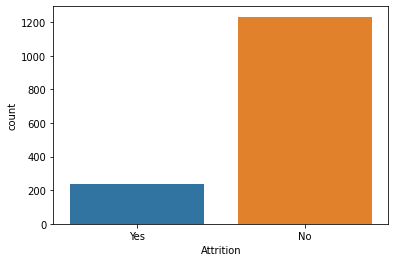

In [14]:
sns.countplot(x='Attrition', data= attrition)

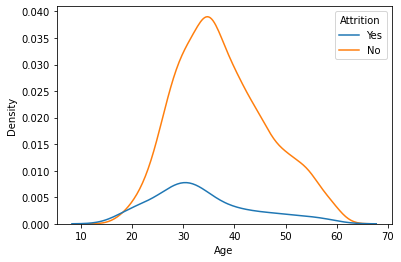

In [15]:
sns.kdeplot(x='Age', hue='Attrition', data=attrition)

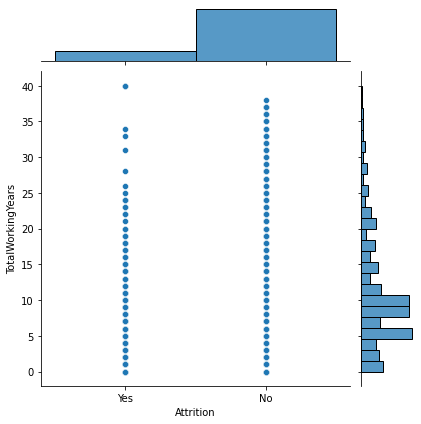

In [16]:
sns.jointplot(x='Attrition',y='TotalWorkingYears',data=attrition)

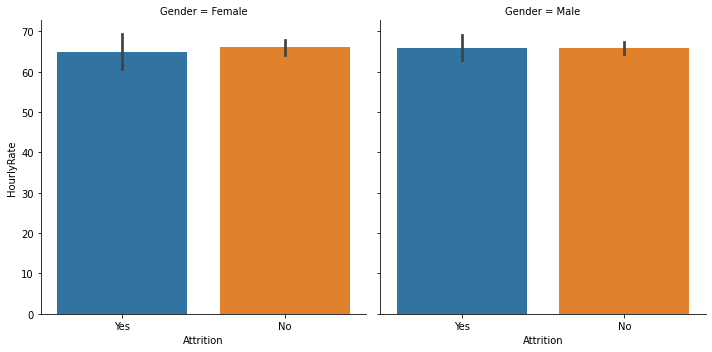

In [17]:
sns.catplot(x='Attrition',y='HourlyRate',data=attrition,col='Gender',kind='bar')

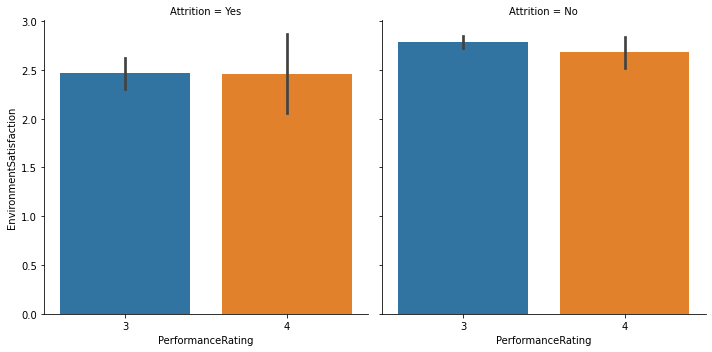

In [18]:
sns.catplot(x='PerformanceRating',y='EnvironmentSatisfaction',data=attrition,col='Attrition',kind='bar')

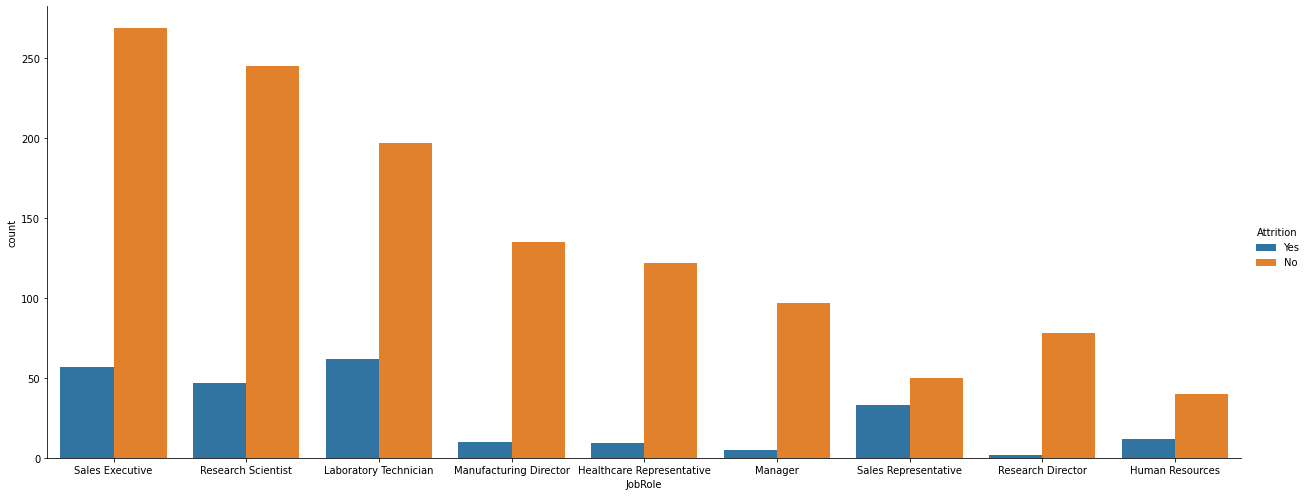

In [19]:
sns.catplot(x='JobRole',hue='Attrition',data=attrition,kind='count',height=7,aspect=2.5)

In [20]:
attrition.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [21]:
attrition.dtypes[attrition.dtypes=='int64'].index.values

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'], dtype=object)

In [22]:
attrition=attrition.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours'],axis = 1)
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [23]:
attrition = attrition.replace({"BusinessTravel":rp_businesstravel})
attrition = attrition.replace({"Department":rp_department})
attrition = attrition.replace({"EducationField":rp_eduf})
attrition = attrition.replace({"Gender":rp_gender})
attrition = attrition.replace({"JobRole":rp_role})
attrition = attrition.replace({"MaritalStatus":rp_mstat})
attrition = attrition.replace({"OverTime":rp_overtime})

In [24]:
attrition = attrition.astype({'BusinessTravel':'int64','Department':'int64','EducationField':'int64','Gender':'int64','JobRole':'int64','MaritalStatus':'int64','OverTime':'int64'})

In [25]:
attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,3,1102,3,1,2,2,2,1,...,3,1,0,8,0,1,6,4,0,5
1,49,No,2,279,2,8,1,2,3,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,3,1373,2,2,2,5,4,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,2,1392,2,3,4,2,4,1,...,3,3,0,8,3,3,8,7,3,0
4,27,No,3,591,2,2,1,4,1,2,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,2,884,2,23,2,4,3,2,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,3,613,2,6,1,4,4,2,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,3,155,2,4,3,2,2,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,2,1023,3,2,3,4,4,2,...,3,4,0,17,3,2,9,6,0,8


In [26]:
y = attrition['Attrition']

In [27]:
X = attrition[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7, random_state=2529)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1029, 30), (441, 30), (1029,), (441,))

In [30]:
model = RandomForestClassifier()

In [31]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
y_pred=model.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred)

0.8662131519274376

In [34]:
confusion_matrix(y_test,y_pred)

array([[372,   2],
       [ 57,  10]])

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.99      0.93       374
         Yes       0.83      0.15      0.25        67

    accuracy                           0.87       441
   macro avg       0.85      0.57      0.59       441
weighted avg       0.86      0.87      0.82       441



In [36]:
attrition2 = attrition2.iloc[[1052]]
attrition2

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1052,30,No,Non-Travel,990,Research & Development,7,3,Technical Degree,1,1482,...,2,80,2,1,2,2,1,0,0,0


In [37]:
attrition2=attrition2.drop(['EmployeeCount','EmployeeNumber','Over18','StandardHours','Attrition'],axis = 1)
attrition2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1052,30,Non-Travel,990,Research & Development,7,3,Technical Degree,3,Male,64,...,3,2,2,1,2,2,1,0,0,0


In [38]:
attrition2 = attrition2.replace({"BusinessTravel":rp_businesstravel})
attrition2 = attrition2.replace({"Department":rp_department})
attrition2 = attrition2.replace({"EducationField":rp_eduf})
attrition2 = attrition2.replace({"Gender":rp_gender})
attrition2 = attrition2.replace({"JobRole":rp_role})
attrition2 = attrition2.replace({"MaritalStatus":rp_mstat})
attrition2 = attrition2.replace({"OverTime":rp_overtime})

In [39]:
attrition2 = attrition2.astype({'BusinessTravel':'int64','Department':'int64','EducationField':'int64','Gender':'int64','JobRole':'int64','MaritalStatus':'int64','OverTime':'int64'})

In [40]:
attrition2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1052,30,1,990,2,7,3,6,3,2,64,...,3,2,2,1,2,2,1,0,0,0


In [41]:
X2 = attrition2[['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager']]

In [42]:
X2

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1052,30,1,990,2,7,3,6,3,2,64,...,3,2,2,1,2,2,1,0,0,0


In [43]:
y2_predict = model.predict(X2)

In [44]:
y2_predict

array(['No'], dtype=object)